## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 3s 13ms/step - loss: 2.2792 - accuracy: 0.1544 - val_loss: 2.2296 - val_accuracy: 0.2095
Epoch 2/500
196/196 [==============================] - 2s 12ms/step - loss: 2.2046 - accuracy: 0.2148 - val_loss: 2.1735 - val_accuracy: 0.2342
Epoch 3/500
196/196 [==============================] - 2s 12ms/step - loss: 2.1539 - accuracy: 0.2376 - val_loss: 2.1278 - val_accuracy: 0.2474
Epoch 4/500
196/196 [==============================] - 2s 12ms/step - loss: 2.1116 - accuracy: 0.2529 - val_loss: 2.0883 - val_accuracy: 0.2690
Epoch 5/500
196/196 [==============================] - 3s 13ms/step - loss: 2.0744 - accuracy: 0.2687 - val_loss: 2.0546 - val_accuracy: 0.2823
Epoch 6/500
196/196 [==============================] - 3s 13ms/step - loss: 2.0422 - accuracy: 0.2815 - val_loss: 2.0236 - val_accuracy: 0.2914
Epoch 7/500
196/196 [==============================] - 2s 12ms/step - loss: 2.0144 - accuracy: 0.2934 - val_loss: 1.9983 - val_accuracy:

196/196 [==============================] - 3s 14ms/step - loss: 1.6762 - accuracy: 0.4185 - val_loss: 1.6788 - val_accuracy: 0.4217
Epoch 58/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6731 - accuracy: 0.4188 - val_loss: 1.6757 - val_accuracy: 0.4205
Epoch 59/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6701 - accuracy: 0.4207 - val_loss: 1.6736 - val_accuracy: 0.4225
Epoch 60/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6672 - accuracy: 0.4215 - val_loss: 1.6713 - val_accuracy: 0.4222
Epoch 61/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6642 - accuracy: 0.4219 - val_loss: 1.6683 - val_accuracy: 0.4243
Epoch 62/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6610 - accuracy: 0.4236 - val_loss: 1.6655 - val_accuracy: 0.4238
Epoch 63/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6581 - accuracy: 0.4256 - val_loss: 1.6642 - val_accuracy: 0.425

196/196 [==============================] - 2s 12ms/step - loss: 1.5390 - accuracy: 0.4645 - val_loss: 1.5607 - val_accuracy: 0.4526
Epoch 114/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5374 - accuracy: 0.4653 - val_loss: 1.5589 - val_accuracy: 0.4536
Epoch 115/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5354 - accuracy: 0.4661 - val_loss: 1.5622 - val_accuracy: 0.4535
Epoch 116/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5335 - accuracy: 0.4663 - val_loss: 1.5549 - val_accuracy: 0.4545
Epoch 117/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5318 - accuracy: 0.4675 - val_loss: 1.5556 - val_accuracy: 0.4574
Epoch 118/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5298 - accuracy: 0.4675 - val_loss: 1.5556 - val_accuracy: 0.4513
Epoch 119/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5277 - accuracy: 0.4682 - val_loss: 1.5500 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 1.4423 - accuracy: 0.4980 - val_loss: 1.4923 - val_accuracy: 0.4717
Epoch 170/500
196/196 [==============================] - 2s 12ms/step - loss: 1.4411 - accuracy: 0.4974 - val_loss: 1.4867 - val_accuracy: 0.4744
Epoch 171/500
196/196 [==============================] - 2s 12ms/step - loss: 1.4394 - accuracy: 0.4982 - val_loss: 1.4824 - val_accuracy: 0.4777
Epoch 172/500
196/196 [==============================] - 2s 12ms/step - loss: 1.4377 - accuracy: 0.4996 - val_loss: 1.5001 - val_accuracy: 0.4711
Epoch 173/500
196/196 [==============================] - 2s 13ms/step - loss: 1.4365 - accuracy: 0.4997 - val_loss: 1.4902 - val_accuracy: 0.4725
Epoch 174/500
196/196 [==============================] - 2s 12ms/step - loss: 1.4344 - accuracy: 0.5008 - val_loss: 1.4843 - val_accuracy: 0.4716
Epoch 175/500
196/196 [==============================] - 3s 13ms/step - loss: 1.4329 - accuracy: 0.4999 - val_loss: 1.4820 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 1.3595 - accuracy: 0.5256 - val_loss: 1.4400 - val_accuracy: 0.4881
Epoch 226/500
196/196 [==============================] - 2s 12ms/step - loss: 1.3582 - accuracy: 0.5270 - val_loss: 1.4305 - val_accuracy: 0.4928
Epoch 227/500
196/196 [==============================] - 2s 12ms/step - loss: 1.3565 - accuracy: 0.5273 - val_loss: 1.4294 - val_accuracy: 0.4952
Epoch 228/500
196/196 [==============================] - 2s 12ms/step - loss: 1.3552 - accuracy: 0.5276 - val_loss: 1.4331 - val_accuracy: 0.4922
Epoch 229/500
196/196 [==============================] - 2s 12ms/step - loss: 1.3544 - accuracy: 0.5287 - val_loss: 1.4285 - val_accuracy: 0.4955
Epoch 230/500
196/196 [==============================] - 2s 12ms/step - loss: 1.3531 - accuracy: 0.5294 - val_loss: 1.4262 - val_accuracy: 0.4944
Epoch 231/500
196/196 [==============================] - 2s 12ms/step - loss: 1.3515 - accuracy: 0.5286 - val_loss: 1.4294 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 1.2867 - accuracy: 0.5518 - val_loss: 1.3938 - val_accuracy: 0.5089
Epoch 282/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2861 - accuracy: 0.5515 - val_loss: 1.3907 - val_accuracy: 0.5049
Epoch 283/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2849 - accuracy: 0.5528 - val_loss: 1.3949 - val_accuracy: 0.5061
Epoch 284/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2838 - accuracy: 0.5519 - val_loss: 1.4015 - val_accuracy: 0.5007
Epoch 285/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2817 - accuracy: 0.5532 - val_loss: 1.3913 - val_accuracy: 0.5076
Epoch 286/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2821 - accuracy: 0.5528 - val_loss: 1.3886 - val_accuracy: 0.5103
Epoch 287/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2798 - accuracy: 0.5533 - val_loss: 1.3955 - val_accuracy:

196/196 [==============================] - 2s 13ms/step - loss: 1.2221 - accuracy: 0.5734 - val_loss: 1.3716 - val_accuracy: 0.5174
Epoch 338/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2214 - accuracy: 0.5737 - val_loss: 1.3579 - val_accuracy: 0.5211
Epoch 339/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2198 - accuracy: 0.5741 - val_loss: 1.3786 - val_accuracy: 0.5127
Epoch 340/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2178 - accuracy: 0.5761 - val_loss: 1.3626 - val_accuracy: 0.5175
Epoch 341/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2179 - accuracy: 0.5761 - val_loss: 1.3967 - val_accuracy: 0.5067
Epoch 342/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2168 - accuracy: 0.5765 - val_loss: 1.3990 - val_accuracy: 0.5085
Epoch 343/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2157 - accuracy: 0.5768 - val_loss: 1.3637 - val_accuracy:

196/196 [==============================] - 2s 13ms/step - loss: 1.1605 - accuracy: 0.5957 - val_loss: 1.3634 - val_accuracy: 0.5185
Epoch 394/500
196/196 [==============================] - 2s 12ms/step - loss: 1.1607 - accuracy: 0.5954 - val_loss: 1.3465 - val_accuracy: 0.5252
Epoch 395/500
196/196 [==============================] - 2s 12ms/step - loss: 1.1600 - accuracy: 0.5938 - val_loss: 1.4200 - val_accuracy: 0.5015
Epoch 396/500
196/196 [==============================] - 2s 13ms/step - loss: 1.1587 - accuracy: 0.5964 - val_loss: 1.3701 - val_accuracy: 0.5138
Epoch 397/500
196/196 [==============================] - 2s 13ms/step - loss: 1.1586 - accuracy: 0.5956 - val_loss: 1.3883 - val_accuracy: 0.5153
Epoch 398/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1571 - accuracy: 0.5966 - val_loss: 1.3421 - val_accuracy: 0.5286
Epoch 399/500
196/196 [==============================] - 3s 13ms/step - loss: 1.1556 - accuracy: 0.5965 - val_loss: 1.3510 - val_accuracy:

196/196 [==============================] - 2s 13ms/step - loss: 1.1028 - accuracy: 0.6155 - val_loss: 1.3437 - val_accuracy: 0.5284
Epoch 450/500
196/196 [==============================] - 2s 12ms/step - loss: 1.1023 - accuracy: 0.6149 - val_loss: 1.3560 - val_accuracy: 0.5209
Epoch 451/500
196/196 [==============================] - 2s 12ms/step - loss: 1.1014 - accuracy: 0.6171 - val_loss: 1.3387 - val_accuracy: 0.5293
Epoch 452/500
196/196 [==============================] - 4s 20ms/step - loss: 1.0999 - accuracy: 0.6166 - val_loss: 1.3522 - val_accuracy: 0.5236
Epoch 453/500
196/196 [==============================] - 2s 13ms/step - loss: 1.0987 - accuracy: 0.6172 - val_loss: 1.3406 - val_accuracy: 0.5330
Epoch 454/500
196/196 [==============================] - 2s 12ms/step - loss: 1.0994 - accuracy: 0.6171 - val_loss: 1.3580 - val_accuracy: 0.5230
Epoch 455/500
196/196 [==============================] - 3s 13ms/step - loss: 1.0979 - accuracy: 0.6179 - val_loss: 1.3489 - val_accuracy:

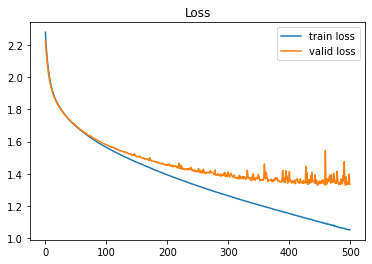

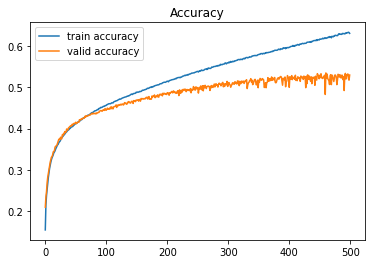

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()